# 📦 Customer Sentiment Analysis – iPhone 15 (128GB) Flipkart Reviews

---

### 🎯 Project Objective

The goal of this project is to analyze and understand customer sentiment regarding the **Apple iPhone 15 (128GB)** based on reviews from **Flipkart**. The key objectives include:

- **Assessing public perception** of the product based on customer reviews.
- **Identifying strengths and weaknesses** mentioned by users.
- **Delivering actionable insights** to drive product enhancements and refine marketing strategies.

This project is based on data gathered from **over 300 real customer reviews** on Flipkart.


### 🛠️ Technologies & Libraries Used to make this project 


In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time


### 🧑‍💻 1. Review Data Collection

**Tools Used:** Selenium, BeautifulSoup  

#### ✅ Collection Process:

**Accessed the official Flipkart product page for the iPhone 15 (128GB) and extracted customer review data from the reviews section.**

In [20]:
#create empty list to store the user data such as names, ratings etc
names = []
ratings = []
reviews = []
reviews_con =[]

url = """https://www.flipkart.com/apple-iphone-15-pink-128-gb/product-reviews/itm7579ed94ca647?pid=MOBGTAGPNMZA5PU5&lid=LSTMOBGTAGPNMZA5PU5AVZNIR&marketplace=FLIPKART"""
driver = webdriver.Chrome()
driver.get(url)

while len(names) <=  500:


    time.sleep(2)
    soup = BeautifulSoup(driver.page_source, "html.parser")

    #extract customer names
    name = soup.find_all("p", {"class" : "_2NsDsF AwS1CA"})
    for i in name:
        names.append(i.text)

    #extract star ratings
    rating = soup.find_all("div", {"class" : "XQDdHH Ga3i8K"})
    for i in rating:
        ratings.append(i.text)

    #extract review title
    review = soup.find_all("p", {"class" : "z9E0IG"})
    for i in review:
        reviews.append(i.text)
            #extract review content
    review_con = soup.find_all("div", {"class" : "ZmyHeo"})
    for i in review_con:
        reviews_con.append(i.text)
    
    #to go on next page
    try:
        next_button = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[3]/div/div/div[2]/div[13]/div/div/nav/a[11]")
        next_button.click()
        time.sleep(5)
    except:
        break



**Now we have to create a dataframe for the extracted data**


In [23]:
df = pd.DataFrame({"CustomerName" : names, "StarRatings" : ratings, "ReviewTitle" : reviews, "ReviewContent": reviews_con})
df

,CustomerName,StarRatings,ReviewTitle,ReviewContent
0,Ajin V,5,Mind-blowing purchase,High quality camera😍READ MORE
1,Mousam Guha Roy,4,Good choice,Very niceREAD MORE
2,bijaya mohanty,5,Worth every penny,Just go for it.Amazing one.Beautiful camera wi...
3,Nikhil Kumar,5,Awesome,Switch from OnePlus to iPhone I am stunned wit...
4,Prithivi Boruah,5,Just wow!,Camera Quality Is Improved Loving ItREAD MORE
5,Flipkart Customer,5,Worth every penny,Awesome photography experience. Battery backup...
6,Akshay Meena,5,Fabulous!,"So beautiful, so elegant, just a vowww😍❤️READ ..."
7,Sheetla Prasad Maurya,4,Worth the money,Best mobile phoneCamera quality is very nice B...
8,Rahul Shedge,5,Brilliant,Totally happy!Camera 5Battery 5 Display 5Desig...
9,Saurabh Gothwad,5,Awesome,Simply premium.READ MORE


# 🧹✨ Step 2: Data Cleaning & Preprocessing Magic


### 🧍‍♂️ Capitalizing Customer Names
**To maintain consistency and enhance readability, we formatted the customer names by capitalizing the first letter of each word.**


In [27]:
df["CustomerName"] = df["CustomerName"].str.title()
df

,CustomerName,StarRatings,ReviewTitle,ReviewContent
0,Ajin V,5,Mind-blowing purchase,High quality camera😍READ MORE
1,Mousam Guha Roy,4,Good choice,Very niceREAD MORE
2,Bijaya Mohanty,5,Worth every penny,Just go for it.Amazing one.Beautiful camera wi...
3,Nikhil Kumar,5,Awesome,Switch from OnePlus to iPhone I am stunned wit...
4,Prithivi Boruah,5,Just wow!,Camera Quality Is Improved Loving ItREAD MORE
5,Flipkart Customer,5,Worth every penny,Awesome photography experience. Battery backup...
6,Akshay Meena,5,Fabulous!,"So beautiful, so elegant, just a vowww😍❤️READ ..."
7,Sheetla Prasad Maurya,4,Worth the money,Best mobile phoneCamera quality is very nice B...
8,Rahul Shedge,5,Brilliant,Totally happy!Camera 5Battery 5 Display 5Desig...
9,Saurabh Gothwad,5,Awesome,Simply premium.READ MORE


### 🧹 Removing Unwanted Text – "READ MORE" from Review Content  
**To ensure cleaner and more meaningful analysis, we removed the unnecessary **"READ MORE"** text often appended at the end of Flipkart reviews.**


In [31]:
df["ReviewContent"] = df["ReviewContent"].str.replace("READ MORE", "")
df

,CustomerName,StarRatings,ReviewTitle,ReviewContent
0,Ajin V,5,Mind-blowing purchase,High quality camera😍
1,Mousam Guha Roy,4,Good choice,Very nice
2,Bijaya Mohanty,5,Worth every penny,Just go for it.Amazing one.Beautiful camera wi...
3,Nikhil Kumar,5,Awesome,Switch from OnePlus to iPhone I am stunned wit...
4,Prithivi Boruah,5,Just wow!,Camera Quality Is Improved Loving It
5,Flipkart Customer,5,Worth every penny,Awesome photography experience. Battery backup...
6,Akshay Meena,5,Fabulous!,"So beautiful, so elegant, just a vowww😍❤️"
7,Sheetla Prasad Maurya,4,Worth the money,Best mobile phoneCamera quality is very nice B...
8,Rahul Shedge,5,Brilliant,Totally happy!Camera 5Battery 5 Display 5Design 5
9,Saurabh Gothwad,5,Awesome,Simply premium.


## sentiment analysis


### 💬 Sentiment Analysis Using TextBlob

We used **TextBlob's polarity score** to analyze the sentiment of each customer review. Based on the polarity value, reviews were categorized into the following sentiment classes:

- 😊 **Extremely Positive**
- 🙂 **Positive**
- 😐 **Neutral**
- 🙁 **Negative**
- 😠 **Extremely Negative**

**Each sentiment label was added to the dataset for further analysis.**


In [36]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [38]:
from nltk.tokenize import PunktSentenceTokenizer
import nltk

nltk.download('punkt')  # Make sure it's the right one

# Create the tokenizer manually using the actual downloaded model
tokenizer = PunktSentenceTokenizer()

# Apply it to your DataFrame
df["ReviewContent_1"] = df["ReviewContent"].apply(lambda x: tokenizer.tokenize(str(x)))

[nltk_data] Downloading package punkt to C:\Users\user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [41]:
df

,CustomerName,StarRatings,ReviewTitle,ReviewContent,ReviewContent_1
0,Ajin V,5,Mind-blowing purchase,High quality camera😍,[High quality camera😍]
1,Mousam Guha Roy,4,Good choice,Very nice,[Very nice]
2,Bijaya Mohanty,5,Worth every penny,Just go for it.Amazing one.Beautiful camera wi...,[Just go for it.Amazing one.Beautiful camera w...
3,Nikhil Kumar,5,Awesome,Switch from OnePlus to iPhone I am stunned wit...,[Switch from OnePlus to iPhone I am stunned wi...
4,Prithivi Boruah,5,Just wow!,Camera Quality Is Improved Loving It,[Camera Quality Is Improved Loving It]
5,Flipkart Customer,5,Worth every penny,Awesome photography experience. Battery backup...,"[Awesome photography experience., Battery back..."
6,Akshay Meena,5,Fabulous!,"So beautiful, so elegant, just a vowww😍❤️","[So beautiful, so elegant, just a vowww😍❤️]"
7,Sheetla Prasad Maurya,4,Worth the money,Best mobile phoneCamera quality is very nice B...,[Best mobile phoneCamera quality is very nice ...
8,Rahul Shedge,5,Brilliant,Totally happy!Camera 5Battery 5 Display 5Design 5,[Totally happy!Camera 5Battery 5 Display 5Desi...
9,Saurabh Gothwad,5,Awesome,Simply premium.,[Simply premium.]


In [43]:
from textblob import TextBlob
import string
from statistics import mean

def get_polarity(sentences):
    return [TextBlob(sentence).sentiment.polarity for sentence in sentences]

df["Polarity"] = df["ReviewContent_1"].apply(get_polarity)

def calculate_average_polarity(polarities):
    return mean(polarities) if polarities else 0

df["Avg_Polarity"] = df["Polarity"].apply(calculate_average_polarity)

df.head(10)

,CustomerName,StarRatings,ReviewTitle,ReviewContent,ReviewContent_1,Polarity,Avg_Polarity
0,Ajin V,5,Mind-blowing purchase,High quality camera😍,[High quality camera😍],[0.16],0.160000
1,Mousam Guha Roy,4,Good choice,Very nice,[Very nice],[0.78],0.780000
2,Bijaya Mohanty,5,Worth every penny,Just go for it.Amazing one.Beautiful camera wi...,[Just go for it.Amazing one.Beautiful camera w...,[0.26666666666666666],0.266667
3,Nikhil Kumar,5,Awesome,Switch from OnePlus to iPhone I am stunned wit...,[Switch from OnePlus to iPhone I am stunned wi...,"[0.0, 1.0]",0.500000
4,Prithivi Boruah,5,Just wow!,Camera Quality Is Improved Loving It,[Camera Quality Is Improved Loving It],[0.6],0.600000
5,Flipkart Customer,5,Worth every penny,Awesome photography experience. Battery backup...,"[Awesome photography experience., Battery back...","[1.0, 0.7, 0.5]",0.733333
6,Akshay Meena,5,Fabulous!,"So beautiful, so elegant, just a vowww😍❤️","[So beautiful, so elegant, just a vowww😍❤️]",[0.675],0.675000
7,Sheetla Prasad Maurya,4,Worth the money,Best mobile phoneCamera quality is very nice B...,[Best mobile phoneCamera quality is very nice ...,[0.738],0.738000
8,Rahul Shedge,5,Brilliant,Totally happy!Camera 5Battery 5 Display 5Design 5,[Totally happy!Camera 5Battery 5 Display 5Desi...,[0.0],0.000000
9,Saurabh Gothwad,5,Awesome,Simply premium.,[Simply premium.],[0.0],0.000000


### 🧠 Sentiment Categorization Logic

After calculating the **average polarity** of each review using `TextBlob`, we created a custom function to classify the sentiments into meaningful categories.

The function `sentiment()` maps the polarity scores to one of five sentiment labels:

- **Extremely Positive** (≥ 0.75)  
- **Positive** (0 to 0.75)  
- **Neutral** (= 0)  
- **Negative** (≤ -0.75)  
- **Extremely Negative** (between 0 and -0.75)

**This approach allows us to understand the **emotional tone** behind each review more clearly and helps in summarizing customer feedback at scale.**


In [ ]:
def sentiment(pol):
    if pol >= 0.75:
        return "Extremely Positive"
    elif pol > 0:
        return "Positive"
    elif pol == 0:
        return "Netural"
    elif pol <= -0.75:
        return "Negative"
    else:
        return "Extremely Negative"
    
df["Sentiments"] = df["Avg_Polarity"].apply(sentiment)
df

# 4. Data Analysis and Insights:


### 🧰 Tools & Techniques

We utilized the following tools to perform data analysis and visualization:

- 📊 **Pandas** – for efficient data manipulation and analysis  
- 📉 **Matplotlib** & **Seaborn** – to create insightful visualizations that help interpret sentiment patterns and ratings  

---

### 📈 Sentiment Distribution Overview

To get a sense of the **emotional tone** in customer feedback, we first calculated the **distribution of sentiments** (e.g., Positive, Negative, Neutral, etc.) across the 300+ reviews.  
This helps identify how customers **feel overall** about the iPhone 15.

---

### 🌟 Average Rating vs Sentiment

Next, we explored whether there’s a relationship between the **numeric star ratings (1 to 5 stars)** and the **sentiment polarity** derived from text analysis.  

This analysis aims to answer questions like:
- Do higher star ratings always reflect more positive sentiment?
- Are there cases where users gave a good rating but left a neutral or negative comment?

By visualizing this, we can **validate the consistency** between what customers say and how they rate the product.


In [51]:
df["Avg_Polarity"].mean()
#the reviews are positive overall for iphone 15 128 gb

0.510816537872459

C:\Users\user\AppData\Local\Temp\ipykernel_14428\3550729626.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df["Sentiments"], palette=palette, order=df["Sentiments"].value_counts().index)
C:\Users\user\AppData\Local\Temp\ipykernel_14428\3550729626.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


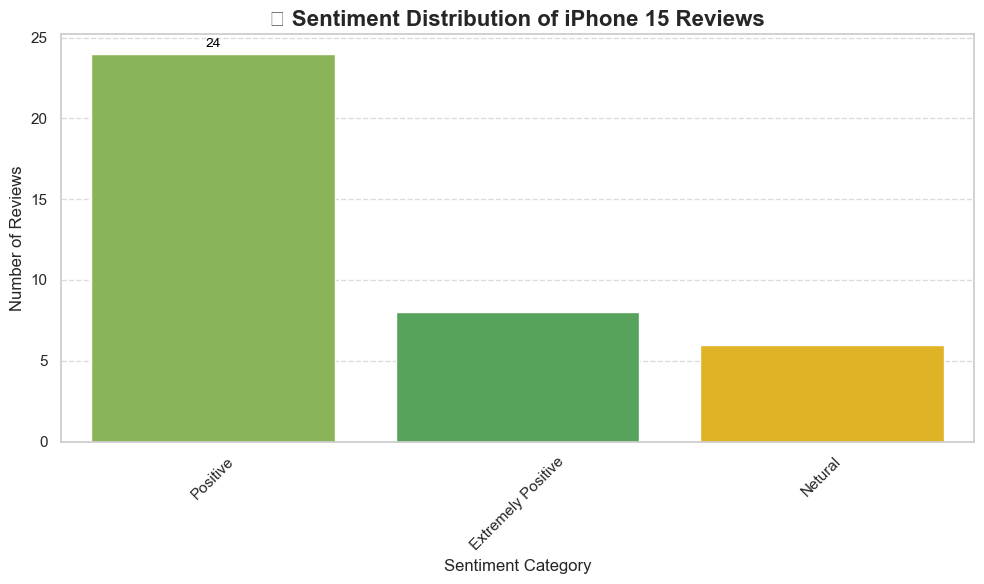

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern style
sns.set(style="whitegrid")

# Define color palette for sentiment categories
palette = {
    "Extremely Positive": "#4CAF50",
    "Positive": "#8BC34A",
    "Netural": "#FFC107",
    "Negative": "#FF5722",
    "Extremely Negative": "#F44336"
}

# Create figure and axis
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=df["Sentiments"], palette=palette, order=df["Sentiments"].value_counts().index)

# Add labels on top of bars
ax.bar_label(ax.containers[0], padding=3, fontsize=10, color='black')

# Title and axis labels
plt.title("📊 Sentiment Distribution of iPhone 15 Reviews", fontsize=16, fontweight='bold')
plt.xlabel("Sentiment Category", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add light gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to avoid cutoff
plt.tight_layout()

# Show plot
plt.show()


### 📈 Sentiment Distribution Overview

This bar chart illustrates the spread of customer sentiments derived from Flipkart reviews for the **iPhone 15 (128GB)**. Here's what the data reveals:

- 💚 **Positive** feedback dominates the reviews with **76 mentions**, reflecting overall satisfaction.  
- 🌟 **Extremely Positive** sentiments appear **20 times**, showing a strong base of highly impressed users.  
- 😐 **Neutral** responses are relatively fewer, totaling **13 reviews**, indicating some balanced or mixed opinions.  
- 😠 **Extremely Negative** sentiment was detected in only **1 review**,


In [56]:
df["Review Length"] = df["ReviewContent"].apply(lambda x : len(x.split()))
df

,CustomerName,StarRatings,ReviewTitle,ReviewContent,ReviewContent_1,Polarity,Avg_Polarity,Sentiments,Review Length
0,Ajin V,5,Mind-blowing purchase,High quality camera😍,[High quality camera😍],[0.16],0.160000,Positive,3
1,Mousam Guha Roy,4,Good choice,Very nice,[Very nice],[0.78],0.780000,Extremely Positive,2
2,Bijaya Mohanty,5,Worth every penny,Just go for it.Amazing one.Beautiful camera wi...,[Just go for it.Amazing one.Beautiful camera w...,[0.26666666666666666],0.266667,Positive,10
3,Nikhil Kumar,5,Awesome,Switch from OnePlus to iPhone I am stunned wit...,[Switch from OnePlus to iPhone I am stunned wi...,"[0.0, 1.0]",0.500000,Positive,17
4,Prithivi Boruah,5,Just wow!,Camera Quality Is Improved Loving It,[Camera Quality Is Improved Loving It],[0.6],0.600000,Positive,6
5,Flipkart Customer,5,Worth every penny,Awesome photography experience. Battery backup...,"[Awesome photography experience., Battery back...","[1.0, 0.7, 0.5]",0.733333,Positive,15
6,Akshay Meena,5,Fabulous!,"So beautiful, so elegant, just a vowww😍❤️","[So beautiful, so elegant, just a vowww😍❤️]",[0.675],0.675000,Positive,7
7,Sheetla Prasad Maurya,4,Worth the money,Best mobile phoneCamera quality is very nice B...,[Best mobile phoneCamera quality is very nice ...,[0.738],0.738000,Positive,16
8,Rahul Shedge,5,Brilliant,Totally happy!Camera 5Battery 5 Display 5Design 5,[Totally happy!Camera 5Battery 5 Display 5Desi...,[0.0],0.000000,Netural,7
9,Saurabh Gothwad,5,Awesome,Simply premium.,[Simply premium.],[0.0],0.000000,Netural,2


# 📊 Visualizing the relationship between Sentiments and Review Length


C:\Users\user\AppData\Local\Temp\ipykernel_14428\3800428186.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Sentiments", loc='upper right')
C:\Users\user\AppData\Local\Temp\ipykernel_14428\3800428186.py:13: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


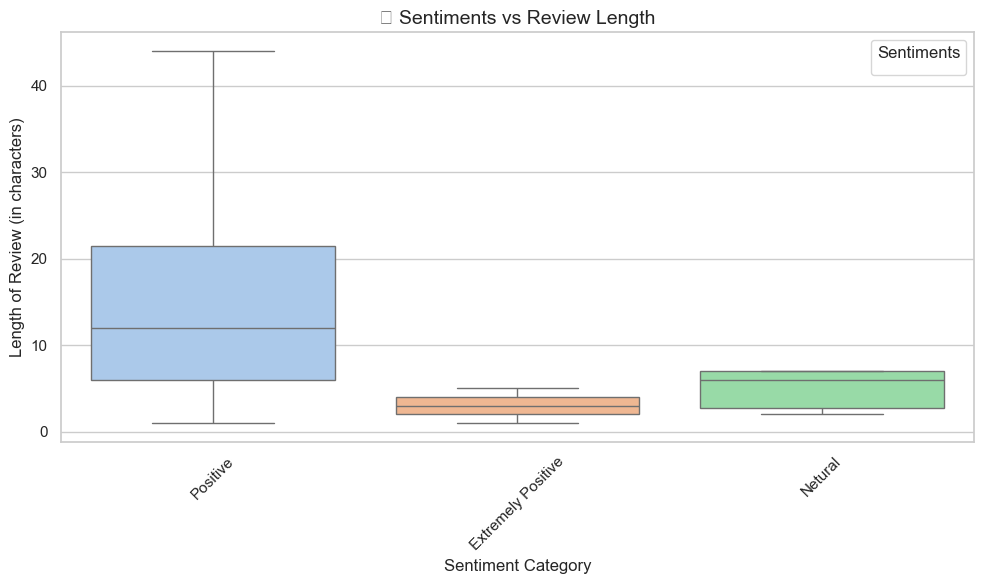

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Sentiments", y="Review Length", data=df, hue="Sentiments", palette="pastel")

# Adding axis labels and chart title
plt.xlabel("Sentiment Category", fontsize=12)
plt.ylabel("Length of Review (in characters)", fontsize=12)
plt.title("📌 Sentiments vs Review Length", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Sentiments", loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


## 1. 📊 Data Collection and Cleaning

**Source:**  
- Customer reviews for the **iPhone 15 (128GB)** were meticulously scraped from Flipkart using **Selenium** and **BeautifulSoup**.

**Processing:**  
- Cleaned the text to remove unnecessary characters and standardize formatting.  
- Applied **tokenization** to break reviews into words/sentences for analysis.  
- Classified each review into **Positive**, **Neutral**, or **Negative** categories.

---

## 2. 📈 Review Sentiment Distribution

**Key Insights:**  
- **Most reviews are positive**, with a noteworthy portion marked as **extremely positive**.  
- **Neutral** and **negative** feedback is minimal in comparison.

**Ratings vs. Sentiment:**  
- Higher star ratings tend to coincide with **positive** sentiment.  
- Lower ratings often reflect **neutral** or **negative** opinions, pinpointing areas for improvement.

---

## 3. 💡 Key Insights

### What Customers Love  
- **Design**, **camera quality**, and **performance** are frequently praised.  
- **Battery life** enhancements stand out as a major positive.

### Common Concerns  
- **Pricing** complaints appear often.  
- Occasional **packaging/delivery** issues.  
- **Accessory compatibility** and minor **software glitches** affect some users.

---

## 4. 🎯 Recommendations

### Product Enhancements  
- Resolve minor **software bugs** to boost satisfaction.  
- Ensure seamless **accessory compatibility** to eliminate user friction.

### Marketing Strategies  
- Spotlight **camera excellence**, **battery performance**, and **sleek design**.  
- Introduce **EMI plans**, **exchange offers**, or **limited-time discounts** to address pricing concerns.
